In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.metrics import r2_score, mean_squared_error
from scipy import stats
import statsmodels.api as sm
%matplotlib inline

In [2]:
df_train = pd.read_csv('datasets/train_polished.csv')
df_test = pd.read_csv('datasets/test_polished.csv')

In [3]:
df_test.shape, df_train.shape

((878, 32), (2051, 33))

In [4]:
df_train.isna().sum().sum()

0

In [5]:
df_test.isna().sum().sum()

0

Text(0.5, 1, 'Sale Price Correlation')

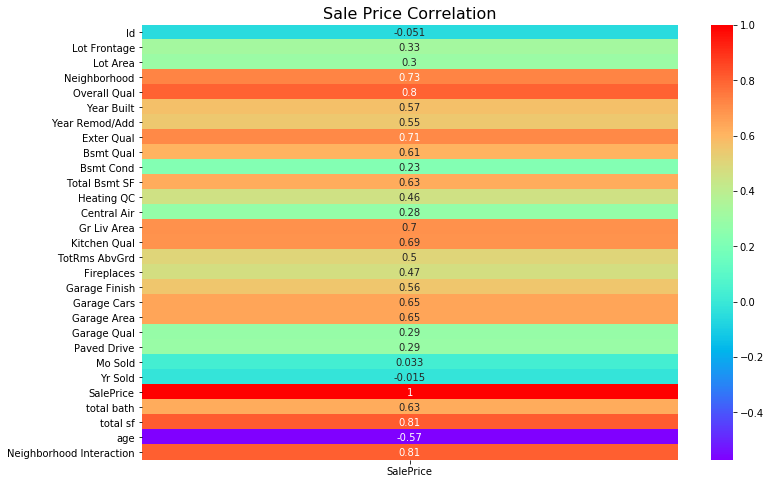

In [6]:
plt.figure(figsize=(12, 8))
sns.heatmap(df_train.corr()[['SalePrice']], annot=True, cmap='rainbow')
plt.title('Sale Price Correlation', fontsize=16)

In [7]:
df_train.head()

,Id,Lot Frontage,Lot Area,Neighborhood,Overall Qual,Year Built,Year Remod/Add,Exterior 1st,Exterior 2nd,Exter Qual,...,Garage Area,Garage Qual,Paved Drive,Mo Sold,Yr Sold,SalePrice,total bath,total sf,age,Neighborhood Interaction
0,109,69,13517,0,6,1976,2005,HdBoard,Plywood,4,...,475.0,3,3,3,2010,130500,2.5,2679.0,34,0.0
1,544,43,11492,2,7,1996,1997,VinylSd,VinylSd,4,...,559.0,3,3,4,2009,220000,3.5,3594.0,13,7188.0
2,153,68,7922,0,5,1953,2007,VinylSd,VinylSd,3,...,246.0,3,3,1,2010,109000,2.0,2360.0,57,0.0
3,318,73,9802,5,5,2006,2007,VinylSd,VinylSd,3,...,400.0,3,3,4,2010,174000,2.5,2228.0,4,11140.0
4,255,82,14235,2,6,1900,1993,Wd Sdng,Plywood,3,...,484.0,3,1,3,2010,138500,2.0,2605.0,110,5210.0


In [8]:
########  making a model and then training the model 
X_train = df_train[['Overall Qual',
       'Exter Qual', 
       'Heating QC', 'Central Air', 'Gr Liv Area', 'Kitchen Qual',
        'Garage Finish', 
       'Garage Qual', 
       'total bath', 'total sf', 'age']]
y_train = df_train['SalePrice'] ## Sale price
####instatiatie model
model = LinearRegression()
###fit model to train data
model.fit(X_train, y_train)
# check the score on the training data
model.score(X_train, y_train)

0.8079571538871265

In [9]:
cross_val_score(model, X_train, y_train, cv=5).mean()

0.8034885681824836

In [10]:
X_test = df_test[['Overall Qual',
       'Exter Qual', 
       'Heating QC', 'Central Air', 'Gr Liv Area', 'Kitchen Qual',
        'Garage Finish', 
       'Garage Qual', 
       'total bath', 'total sf', 'age']]  
y_hat = model.predict(X_test)



In [11]:
real_baseline = pd.DataFrame({'Id': df_test['Id'],
                                     'SalePrice': y_hat,})
real_baseline.head()

,Id,SalePrice
0,2658,157198.433350
1,2718,205189.483855
2,2414,211431.191383
3,1989,126677.634905
4,625,176008.277129


In [12]:
real_baseline.shape

(878, 2)

In [13]:
real_baseline.to_csv('real_baseline.csv', index=False)

In [15]:
X = df_train[['Lot Frontage', 'Lot Area',  'Overall Qual',
       'Heating QC', 'Central Air', 'Kitchen Qual',
       'TotRms AbvGrd', 'Fireplaces',
       'Garage Cars', 
       'Garage Qual', 'Paved Drive', 
       'total bath', 'total sf', 'age']]
y = df_train['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    random_state=25)
lr = LinearRegression()
lr.fit(X_train, y_train);
# Train score
print('train score', lr.score(X_train, y_train))
# Test score
print('test score', lr.score(X_test, y_test))
# Cross val score
print('cross val score', cross_val_score(lr, X_train, y_train, cv=10).mean())

train score 0.8044288449975281
test score 0.8399592896670556
cross val score 0.7835730757436712


In [16]:
df_train.head()

,Id,Lot Frontage,Lot Area,Neighborhood,Overall Qual,Year Built,Year Remod/Add,Exterior 1st,Exterior 2nd,Exter Qual,...,Garage Area,Garage Qual,Paved Drive,Mo Sold,Yr Sold,SalePrice,total bath,total sf,age,Neighborhood Interaction
0,109,69,13517,0,6,1976,2005,HdBoard,Plywood,4,...,475.0,3,3,3,2010,130500,2.5,2679.0,34,0.0
1,544,43,11492,2,7,1996,1997,VinylSd,VinylSd,4,...,559.0,3,3,4,2009,220000,3.5,3594.0,13,7188.0
2,153,68,7922,0,5,1953,2007,VinylSd,VinylSd,3,...,246.0,3,3,1,2010,109000,2.0,2360.0,57,0.0
3,318,73,9802,5,5,2006,2007,VinylSd,VinylSd,3,...,400.0,3,3,4,2010,174000,2.5,2228.0,4,11140.0
4,255,82,14235,2,6,1900,1993,Wd Sdng,Plywood,3,...,484.0,3,1,3,2010,138500,2.0,2605.0,110,5210.0


In [17]:
X = df_train[['Lot Frontage', 'Lot Area',  'Overall Qual',
       'Year Built', 'Year Remod/Add', 
       'Exter Qual', 'Bsmt Qual', 'Bsmt Cond', 'Total Bsmt SF',
       'Heating QC', 'Central Air', 'Gr Liv Area', 'Kitchen Qual',
       'TotRms AbvGrd', 'Fireplaces', 
        'Garage Finish', 'Garage Cars', 'Garage Area',
       'Garage Qual', 'Paved Drive', 'Mo Sold', 'Yr Sold',
       'total bath', 'total sf', 'age']]
X = sm.add_constant(X)
y = df_train['SalePrice']
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     412.9
Date:                Fri, 10 Apr 2020   Prob (F-statistic):               0.00
Time:                        15:03:12   Log-Likelihood:                -24264.
No. Observations:                2051   AIC:                         4.858e+04
Df Residuals:                    2027   BIC:                         4.871e+04
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           1.501e+06   1.16e+06      1.